# Comparando o desempenho dos modelos

Nesse notebook, serão comparadas as performances obtidas pelos diferentes modelos no conjunto _holdout_, assim como seus tempos de treino e avaliação.

In [1]:
import pickle
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from pathlib import Path
from datetime import datetime

In [2]:
%matplotlib inline

model_path = Path('../models')
outpath = Path('../src')

sns.set(font_scale=1.2)

## Importando métricas

In [3]:
with open(f'{model_path}/logistic_regression_holdout_metrics.pickle', 'rb') as file:
    logreg_metrics = pickle.load(file)
    
with open(f'{model_path}/decision_tree_holdout_metrics.pickle', 'rb') as file:
    dt_metrics = pickle.load(file)
    
with open(f'{model_path}/random_forest_holdout_metrics.pickle', 'rb') as file:
    rf_metrics = pickle.load(file)

## Comparando tempo de execução

In [4]:
eval_times = []
train_times = []

for obj in [logreg_metrics, dt_metrics, rf_metrics]:
    eval_times.append(obj['eval_time'].microseconds/(10**6))
    
    t = obj['train_time']
    
    train_times.append(t.seconds + t.microseconds/(10**6))

In [5]:
time_metrics = pd.DataFrame({
    'model': ['Logistic Regression', 'Decision Trees', 'Random Forest'],
    'eval_time': eval_times,
    'train_time': train_times,
})

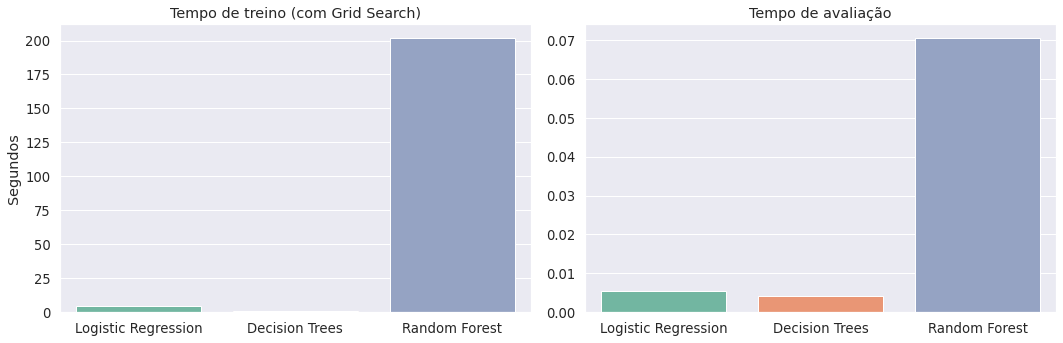

In [6]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))

sns.barplot(x='model', y='train_time', data=time_metrics, 
            ax=ax[0], palette="Set2")
sns.barplot(x='model', y='eval_time', data=time_metrics, 
            ax=ax[1], palette="Set2")

# labels
ax[0].set_ylabel('Segundos')
ax[1].set_ylabel('')
ax[0].set_xlabel('')
ax[1].set_xlabel('')
ax[0].set_title('Tempo de treino (com Grid Search)')
ax[1].set_title('Tempo de avaliação')

plt.tight_layout()
plt.savefig(f'{outpath}/time_comparison.png')

Vemos nos gráficos acima que o modelo de Random Forest foi o que obteve os maiores tempos de treino e avaliação. Em um ambiente de produção, este é um fator que precisa ser levado em consideração, onde o modelo precisa avaliar um grande número de clientes, idealmente, em poucos segundos.

## Performance Metrics

In [7]:
precision = []
recall = []
balanced_acc = []
f1_train = []
f1_holdout = []
roc_auc = []

for obj in [logreg_metrics, dt_metrics, rf_metrics]:
    precision.append(obj['precision'])
    recall.append(obj['recall'])
    balanced_acc.append(obj['balanced_accuracy'])
    f1_train.append(obj['f1_train'])
    f1_holdout.append(obj['f1_holdout'])
    roc_auc.append(obj['roc_auc_score'])

In [8]:
performance_metrics = pd.DataFrame({
    'model': ['Logistic Regression', 'Decision Trees', 'Random Forest'],
    'precision': precision, 
    'recall': recall,
    'balanced_accuracy': balanced_acc,
    'f1_train': f1_train,
    'f1_holdout': f1_holdout,
    'roc_auc_score': roc_auc
})

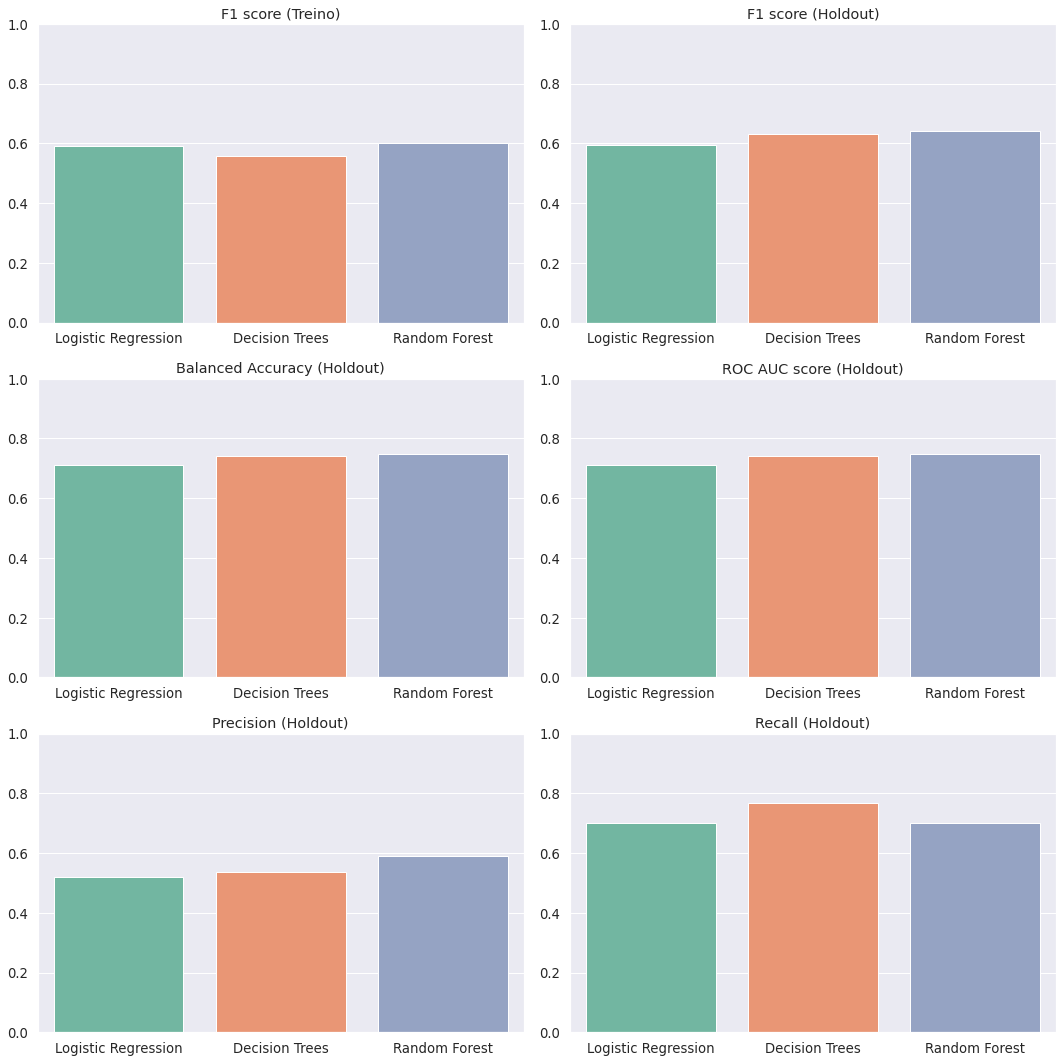

In [9]:
fig, ax = plt.subplots(3, 2, figsize=(15, 15))

sns.barplot(x='model', y='f1_train', data=performance_metrics, 
            ax=ax[0,0], palette="Set2")
sns.barplot(x='model', y='f1_holdout', data=performance_metrics, 
            ax=ax[0,1], palette="Set2")
sns.barplot(x='model', y='balanced_accuracy', data=performance_metrics, 
            ax=ax[1,0], palette="Set2")
sns.barplot(x='model', y='roc_auc_score', data=performance_metrics, 
            ax=ax[1,1], palette="Set2")
sns.barplot(x='model', y='precision', data=performance_metrics, 
            ax=ax[2,0], palette="Set2")
sns.barplot(x='model', y='recall', data=performance_metrics, 
            ax=ax[2,1], palette="Set2")

# titles
titles = [['F1 score (Treino)', 'F1 score (Holdout)'], 
          ['Balanced Accuracy (Holdout)', 'ROC AUC score (Holdout)'],
          ['Precision (Holdout)', 'Recall (Holdout)']] 

# ajustes (labels e escala do eixo y)
for i in range(0,3):
    for j in range(0,2):
        ax[i,j].set_ylabel('')
        ax[i,j].set_xlabel('')
        ax[i,j].set_ylim([0.0, 1.0])    
        ax[i,j].set_title(titles[i][j])
        
plt.tight_layout()
plt.savefig(f'{outpath}/holdout_performance_comparison.png')

Como optamos por selecionar modelos com a maior métrica F1, o modelo de Random Forest foi o que apresentou melhor performance segundo essa métrica (tanto no conjunto de treino, quanto no conjunto holdout).

No entanto, levando em consideração o tempo computacional, o modelo de árvores de decisão é uma alternativa viável, apresentando boa performance fora da amostra e baixo tempo computacional para treino e avaliação.

**Fim!**